In [1]:
import pandas as pd
import numpy as np

In [163]:
ground = pd.read_csv('groundtruth-vf.csv',delimiter=',')
test = pd.read_csv('csv/xl.csv',delimiter=',')

In [164]:
ground=ground.sort_values('img')
ground=ground.reset_index(drop=True)
ground.to_csv('tes.csv')

In [165]:
test=test.sort_values('img')
test=test.reset_index(drop=True)

In [169]:
imp=ground[['class-name','conf']]
timp=test[['class-name','conf']]
imp

,class-name,conf
0,person,0.92
1,person,0.92
2,person;car,0.91;0.91
3,person,0.93
4,person,0.93
...,...,...
995,person,0.93
996,person,0.89
997,person,0.93
998,person;truck,0.92;0.66


In [167]:
results=dict()
tp=0
tn=0
fp=0
fn=0
print(len(imp))
for i in range(len(imp)):
    tru=str(imp.loc[i,'class-name']).split(';')
    comp=str(timp.loc[i,'class-name']).split(';')
    if len(tru)==len(comp):
        temp=0
        for j in range(len(tru)):
            if tru[j]=='nan' and comp[j]=='nan':
                tn+=1
            elif tru[j]==comp[j]:
                temp+=1
        if temp == len(tru):
            tp+=1
#             print('tp',tru,comp)
        else:
            if sorted(tru)==sorted(comp):
                tp+=1
#                 print('tp',tru,comp)
            else:
                fp+=1
#                 print('fp',tru,comp)
    elif len(tru)<len(comp):
        fp+=1        
#         print('fp',tru,comp)
    elif len(tru)>len(comp):
        fn+=1
#         print('fn',tru,comp)
print(tp,fp,fn,tn)

1000
901 30 69 1


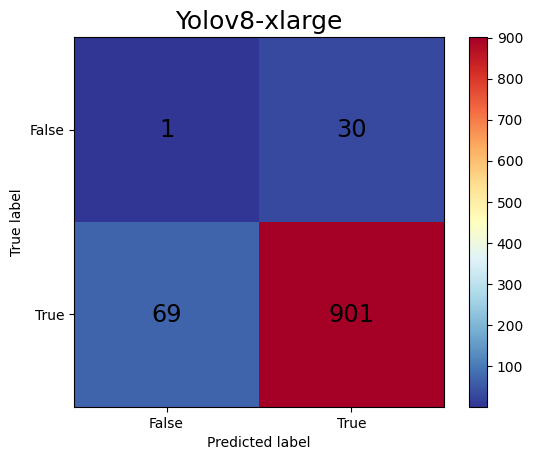

In [168]:
from sklearn import metrics
fig, ax = plt.subplots() 

confusion_matrix=np.array([[tn,fp],[fn,tp]])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
# ax.matshow(confusion_matrix, alpha=0.5, cmap='twilight_shifted_r')
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix[i, j], va='center', ha='center', size='xx-large')

plt.title('Yolov8-xlarge', fontsize=18)
# ax.set_xticks([0,1])
# ax.set_xticklabels(['False','True'])
# ax.set_yticks([0,1])
# ax.set_yticklabels(['False','True'])
# plt.show() 
cm_display.plot(ax=ax,cmap='RdYlBu_r',include_values=False)
plt.savefig('xlarge.jpg')

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'